http://localhost:1313/p/Langchain的简易教程

# 快速上手示例：构建一个简单的问答系统

In [2]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from dotenv import load_dotenv
import os
load_dotenv()

# 初始化模型
# 可以使用OpenAI的API
# llm = ChatOpenAI(model="gpt-4", api_key="your-openai-api-key")
# 或者可以用其他的API，比如阿里云的
api_key = os.getenv("api_key")
base_url = os.getenv("base_url")
llm = ChatOpenAI(api_key=api_key, base_url=base_url,model="qwq-32b",streaming=True)

###################调用方法一########################
result = llm.stream("2025年的技术趋势是什么？")
for chunk in result:
    print(chunk.content, end='', flush=True)
###################################################


###################调用方法二##########################
# 定义提示模板
prompt = PromptTemplate(
    input_variables=["question"],
    template="请简洁回答以下问题：{question}"
)

# 创建链
chain = LLMChain(llm=llm, prompt=prompt)

# 运行链
question = "2025年的技术趋势是什么？"
response = chain.run(question)
print(response)
######################################################

2025年的技术趋势将受到当前技术发展的延续、突破性创新以及社会需求的推动。以下是一些关键领域的预测和分析，涵盖技术发展、应用场景及潜在影响：

---

### **1. 人工智能（AI）与机器学习**
- **生成式AI的普及**：  
  生成式AI（如GPT-5、DALL·E 3等）将更加成熟，能够生成高质量的文本、图像、视频和3D内容，广泛应用于内容创作、广告、游戏和虚拟世界。  
  - **应用**：企业将利用生成式AI自动化报告、设计和创意工作，但需解决版权和伦理问题。  
  - **挑战**：虚假信息（如深度伪造）的监管和AI伦理框架的完善将成为焦点。

- **AI与医疗的深度融合**：  
  AI辅助诊断、个性化治疗和药物研发将更加普及，例如通过分析基因组数据定制癌症治疗方案。  
  - **突破**：AI可能在2025年实现对罕见病的早期诊断和预测性医疗。

- **AI驱动的自动化**：  
  自动化将扩展到更多领域，如制造业、物流和服务业，但可能导致部分岗位被取代，需推动职业再培训。

---

### **2. 量子计算**
- **实用化初步落地**：  
  量子计算机将从实验室走向行业应用，解决传统计算机难以处理的问题（如药物分子模拟、密码学破解）。  
  - **领域**：金融行业可能利用量子计算优化投资组合，而材料科学将加速新材料（如超导体）的开发。

- **量子加密与安全**：  
  量子通信技术（如量子密钥分发）将提升数据传输的安全性，同时推动后量子密码学标准的制定。

---

### **3. 通信与网络技术**
- **6G网络的初步部署**：  
  6G将提供比5G快100倍的速度，支持更广泛的物联网设备连接，为自动驾驶、远程手术和全息通信奠定基础。  
  - **挑战**：高频段信号覆盖和能耗问题仍需解决。

- **边缘计算与分布式网络**：  
  边缘计算将减少数据传输延迟，支持实时分析（如自动驾驶决策、工业物联网），同时推动去中心化网络架构。

---

### **4. 自动驾驶与交通**
- **L4级自动驾驶的商业化**：  
  在特定区域（如城市中心、高速路）实现无人驾驶出租车和物流车辆的规模化应用，但完全无人驾驶仍面临法规和公众接受度的挑战。  
  - **影响**：可能重

C:\Users\zata\AppData\Local\Temp\ipykernel_28576\182543099.py:32: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt)
C:\Users\zata\AppData\Local\Temp\ipykernel_28576\182543099.py:36: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = chain.run(question)


2025年的技术趋势将聚焦于以下领域：  
1. **人工智能（AI）深化应用**：生成式AI、AI芯片优化、AI驱动的自动化（如医疗、制造）。  
2. **量子计算突破**：实用化进展，应用于药物研发、加密和复杂问题解决。  
3. **扩展现实（XR）普及**：AR/VR在教育、远程协作和消费领域的沉浸式体验。  
4. **绿色技术加速**：可再生能源、碳捕捉技术及可持续材料的规模化应用。  
5. **自动驾驶商业化**：L4级自动驾驶在特定场景（如城市物流、限定区域）落地。  
6. **生物科技革新**：基因编辑（如CRISPR）、合成生物学推动个性化医疗和生物制造。  
7. **边缘计算与6G网络**：低延迟、高速连接支持物联网和实时数据处理。  
8. **数字孪生扩展**：虚拟模型用于城市、工业系统的优化与预测性维护。  
9. **网络安全强化**：零信任架构和AI驱动的威胁检测应对复杂攻击。  
10. **太空技术商业化**：低成本卫星互联网（如Starlink）和太空资源探索。  

这些趋势将推动产业升级与社会效率提升，同时需关注伦理与安全挑战。


# 进阶功能：RAG 系统

In [19]:
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.document_loaders import TextLoader
from langchain_community.embeddings import DashScopeEmbeddings
from dotenv import load_dotenv
load_dotenv()
# 加载文档
loader = TextLoader("example_doc.txt")
documents = loader.load()

api_key = os.getenv("api_key")
base_url = os.getenv("base_url")


embeddings = DashScopeEmbeddings(
    model="text-embedding-v3",
    dashscope_api_key=api_key,
    # base_url=base_url
)



vector_store = FAISS.from_documents(documents, embeddings)

# 初始化检索链
qa_chain = RetrievalQA.from_chain_type(
     
    llm=ChatOpenAI(api_key=api_key, base_url=base_url,model="qwq-32b",streaming=True),
    chain_type="stuff",
    retriever=vector_store.as_retriever()
)

# 查询
response = qa_chain.run("文档中提到的重要内容是什么？")
print(response)


根据您提供的文档内容，以下是提到的重要内容总结：

---

### **核心模块与功能**
1. **模型 I/O**  
   - 与 LLM 交互，支持 OpenAI、阿里云（如 `qwq-32b`）、Anthropic 等模型。
   - 示例：通过 `ChatOpenAI` 初始化模型，调用 `llm.invoke()` 或 `chain.run()` 获取响应。

2. **内存（Memory）**  
   - 保存对话历史，例如 `ConversationBufferMemory` 可记住用户之前的输入。
   - 示例：在 `ConversationChain` 中使用内存，实现多轮对话的上下文感知。

3. **链（Chains）**  
   - 组合提示、模型和逻辑，例如 `LLMChain` 处理单一流程，`SequentialChain` 连接多个链。
   - 示例：通过 `PromptTemplate` 定义问题模板，结合模型生成回答。

4. **检索（Retrieval）**  
   - 通过向量数据库（如 FAISS 或 Qdrant）实现检索增强生成（RAG）。
   - 示例：加载外部文档，使用 `OpenAIEmbeddings` 创建向量存储，通过 `RetrievalQA` 回答基于文档的问题。

5. **代理（Agents）**  
   - 让 LLM 动态调用工具（如维基百科搜索、计算器等）解决问题。
   - 示例：使用 `initialize_agent` 结合 `WikipediaAPIWrapper` 获取实时信息。

6. **LangGraph**  
   - 构建复杂工作流或多代理系统，支持状态管理和节点间逻辑。
   - 示例：定义状态和节点函数，通过 `StateGraph` 编排流程。

---

### **关键代码示例**
1. **基础问答系统**  
   ```python
   # 使用阿里云模型
   llm = ChatOpenAI(
       api_key=os.getenv("api_key"),
       base_url=os.getenv("base_url"),
       model=os.getenv("model"),
       stre

# 使用LangGraph构建复杂代理

StateGraph：这是 LangGraph 的核心类，用于构建状态图。
END：一个内置的终点标记，表示工作流结束。
TypedDict：Python 的类型提示工具，用于定义状态的结构。这里定义了一个 AgentState，它有两个字段：question（问题）和 answer（回答）。

In [ ]:
from langgraph.graph import StateGraph, END
from typing import TypedDict

# 定义状态
class AgentState(TypedDict):
    question: str
    answer: str
    processed: bool

# 节点1：处理问题
def process_question_node(state: AgentState) -> AgentState:
    state["answer"] = f"正在处理你的问题：{state['question']}  state[\"processed\"] = False 直接结束 "
    # state["processed"] = True
    return state

# 节点2：生成最终回答
def generate_answer_node(state: AgentState) -> AgentState:
    if "天气" in state["question"]:
        state["answer"] = "今天天气晴朗，温度25摄氏度。"
    else:
        state["answer"] = "这是一个好问题，但我需要更多信息来回答。"
    return state

# 条件函数：决定下一步
def decide_next(state: AgentState):
    if state["processed"]:
        return "generate_answer"
    return END

# 创建状态图
workflow = StateGraph(AgentState)

# 添加节点
workflow.add_node("process_question", process_question_node)
workflow.add_node("generate_answer", generate_answer_node)

# 设置入口点
workflow.set_entry_point("process_question")

# 添加边
workflow.add_conditional_edges(
    "process_question",
    decide_next,
    {
        "generate_answer": "generate_answer",
        END: END
    }
)
workflow.add_edge("generate_answer", END)

# 编译并运行
graph = workflow.compile()
result = graph.invoke({"question": "今天天气如何？", "processed": False})
print(result["answer"])

今天天气晴朗，温度25摄氏度。


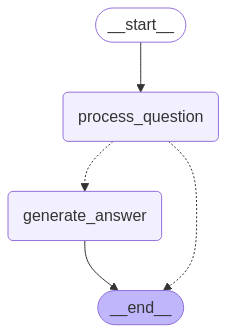

In [16]:
graph